In [ ]:
# Clona o repositório do YOLOv9
!git clone https://github.com/carlosfab/yolov9.git

# Muda o diretório de trabalho atual para o repositório YOLOv9 clonado
%cd yolov9

# Instala as dependências necessárias do YOLOv9 a partir do arquivo requirements.txt
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 372, done.
remote: Total 372 (delta 0), reused 0 (delta 0), pack-reused 372 (from 1)
Receiving objects: 100% (372/372), 2.54 MiB | 11.39 MiB/s, done.
Resolving deltas: 100% (186/186), done.
/content/yolov9


In [3]:
pip install Pillow==9.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 25.5 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-genai 0.1.0 requires pillow<12.0.0,>=10.0.0, but you have pillow 9.5.0 which is incompatible.


In [3]:
# Importa bibliotecas necessárias
import sys
import requests
from tqdm.notebook import tqdm
from pathlib import Path
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

In [ ]:
# Configuração de diretórios para código e dados
CODE_FOLDER = Path("..").resolve()  # Diretório do código
WEIGHTS_FOLDER = CODE_FOLDER / "weights"  # Diretório para pesos do modelo
DATA_FOLDER = CODE_FOLDER / "data"  # Diretório para dados

# Cria os diretórios para pesos e dados, se não existirem
WEIGHTS_FOLDER.mkdir(exist_ok=True, parents=True)
DATA_FOLDER.mkdir(exist_ok=True, parents=True)

print(f"Diretório do código: {CODE_FOLDER}")
print(f"Diretório para pesos do modelo: {WEIGHTS_FOLDER}")
print(f"Diretório para dados: {DATA_FOLDER}")

Diretório do código: /content
Diretório para pesos do modelo: /content/weights
Diretório para dados: /content/data


In [ ]:
# Adiciona o diretório do código ao path do Python para importação de módulos
sys.path.append(str(CODE_FOLDER))

rcParams['figure.figsize'] = 15, 15
%matplotlib inline

In [ ]:
# URLs dos arquivos de pesos
weight_files = [
    "https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt",
    "https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt",
    "https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt",
    "https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt"
]

# Itera sobre a lista de URLs para baixar os arquivos de pesos
for i, url in enumerate(weight_files, start=1):
    filename = url.split('/')[-1]
    response = requests.get(url, stream=True)
    total_size_in_bytes = int(response.headers.get('content-length', 0))
    block_size = 1024  # 1 Kilobyte
    progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True, desc=f"Baixando arquivo {i}/{len(weight_files)}: {filename}")
    with open(WEIGHTS_FOLDER / filename, 'wb') as file:
        for data in response.iter_content(block_size):
            progress_bar.update(len(data))
            file.write(data)
    progress_bar.close()

Baixando arquivo 1/4: yolov9-c.pt:   0%|          | 0.00/103M [00:00<?, ?iB/s]

Baixando arquivo 2/4: yolov9-e.pt:   0%|          | 0.00/140M [00:00<?, ?iB/s]

Baixando arquivo 3/4: gelan-c.pt:   0%|          | 0.00/51.5M [00:00<?, ?iB/s]

Baixando arquivo 4/4: gelan-e.pt:   0%|          | 0.00/117M [00:00<?, ?iB/s]

In [ ]:
# URL da imagem de teste
url = 'https://sigmoidal.ai/wp-content/uploads/2022/11/314928609_1293071608150779_8666358890956473002_n.jpg'

# Faz a requisição para obter a imagem
response = requests.get(url)

# Define o caminho do arquivo onde a imagem será salva dentro do DATA_FOLDER
image_path = DATA_FOLDER / "sem_capacete.jpg"

# Salva a imagem no diretório especificado
with open(image_path, 'wb') as f:
    f.write(response.content)

Detectando em uma imagem

In [ ]:
!python /content/yolov9/detect.py --weights {WEIGHTS_FOLDER}/yolov9-e.pt --conf 0.1 --source {DATA_FOLDER}/com_capacete_celular.png --device cpu

detect: weights=['/content/weights/yolov9-e.pt'], source=/content/data/com_capacete_celular.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 6b38221 Python-3.10.12 torch-2.5.1+cpu CPU

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be

Detectando em um vídeo

In [ ]:
import cv2
import os

# Parâmetros
weights_path = f"{WEIGHTS_FOLDER}/yolov9-e.pt"  # Caminho para os pesos
video_source = f"{DATA_FOLDER}/moto_com_capacete.mp4"  # Caminho para o vídeo
output_path = f"{DATA_FOLDER}/output_video.mp4"  # Caminho para salvar o vídeo processado
confidence_threshold = 0.1  # Confiança mínima

# YOLOv9 Detection Script
!python /content/yolov9/detect.py --weights {weights_path} \
                                  --conf {confidence_threshold} \
                                  --source {video_source} \
                                  --device cpu \
                                  --save-txt \
                                  --project /content/output

# Para salvar o vídeo processado, use OpenCV (opcional)
video = cv2.VideoCapture(video_source)
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec para salvar o vídeo
output_video = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

frame_number = 0
while video.isOpened():
    ret, frame = video.read()
    if not ret:
        break

    # Adicione aqui o script para overlay de bounding boxes, se necessário

    output_video.write(frame)
    frame_number += 1

video.release()
output_video.release()
print(f"Vídeo processado e salvo em {output_path}")


detect: weights=['/content/weights/yolov9-e.pt'], source=/content/data/moto_com_capacete.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/output, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 6b38221 Python-3.10.12 torch-2.5.1+cpu CPU

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be

Incluindo treinamento para detectar capacete nos motociclistas

Banco de dados rotulado: https://universe.roboflow.com/yolo-do-it-yhopz/helmet-detector-9rzmg-bmd6q

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Helmet Detector.v1i.yolov9.zip' -d '/content/drive/MyDrive/Pessoal/Project Helmet'

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /content/drive/MyDrive/Pessoal/Project Helmet/test/labels/IMG_4924_MOV-10_jpg.rf.ef7d3e328d9196ed6486921dedce655d.txt  
  inflating: /content/drive/MyDrive/Pessoal/Project Helmet/test/labels/IMG_4924_MOV-14_jpg.rf.b29c0804cc1c0d8ecbd94c8491d400f7.txt  
  inflating: /content/drive/MyDrive/Pessoal/Project Helmet/test/labels/IMG_4924_MOV-28_jpg.rf.20c3fef1bc0e10c221e66e781ac9933b.txt  
  inflating: /content/drive/MyDrive/Pessoal/Project Helmet/test/labels/IMG_4924_MOV-29_jpg.rf.fc05f8dabfef857ecffc6e4992e001b8.txt  
  inflating: /content/drive/MyDrive/Pessoal/Project Helmet/test/labels/IMG_4924_MOV-30_jpg.rf.c9393ecf745ec37998389b8c9093311b.txt  
  inflating: /content/drive/MyDrive/Pessoal/Project Helmet/test/labels/IMG_4996-2-_mov-0_jpg.rf.86858e4fed86aeea86a37b94197a2660.txt  
  inflating: /content/drive/MyDrive/Pessoal/Project Helmet/test/labels/IMG_4996-2-_mov-12_jpg.rf.977d3dde53ea066d6a87c866d8e9483d.txt  
  inf

In [ ]:
# this is the YAML file we are loading into this notebook with our data
%cd /content/drive/MyDrive/Pessoal/Project_Helmet
%cat data.yaml

/content/drive/MyDrive/Pessoal/Project_Helmet
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 13
names: ['Cycling Helmet', 'half face', 'hard hat', 'helmet', 'modular helmet', 'motorbike', 'motorcyclist', 'no helmet', 'nutshell', 'person', 'plate', 'quarter face helmet', 'sports helmet']

roboflow:
  workspace: yolo-do-it-yhopz
  project: helmet-detector-9rzmg-bmd6q
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/yolo-do-it-yhopz/helmet-detector-9rzmg-bmd6q/dataset/1

In [ ]:
# define number of classes based on YAML
import yaml
with open("/content/drive/MyDrive/Pessoal/Project_Helmet/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
num_classes

'13'

In [ ]:
#this is the model configuration we will use for our tutorial
%cat '/content/drive/MyDrive/Pessoal/Project_Helmet/yolov9/models/detect/yolov9.yaml'

# YOLOv9

# parameters
nc: 13  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple
#activation: nn.LeakyReLU(0.1)
activation: nn.ReLU()

# anchors
anchors: 3

# YOLOv9 backbone
backbone:
  [
   [-1, 1, Silence, []],  
   
   # conv down
   [-1, 1, Conv, [64, 3, 2]],  # 1-P1/2

   # conv down
   [-1, 1, Conv, [128, 3, 2]],  # 2-P2/4

   # elan-1 block
   [-1, 1, RepNCSPELAN4, [256, 128, 64, 1]],  # 3

   # conv down
   [-1, 1, Conv, [256, 3, 2]],  # 4-P3/8

   # elan-2 block
   [-1, 1, RepNCSPELAN4, [512, 256, 128, 1]],  # 5

   # conv down
   [-1, 1, Conv, [512, 3, 2]],  # 6-P4/16

   # elan-2 block
   [-1, 1, RepNCSPELAN4, [512, 512, 256, 1]],  # 7

   # conv down
   [-1, 1, Conv, [512, 3, 2]],  # 8-P5/32

   # elan-2 block
   [-1, 1, RepNCSPELAN4, [512, 512, 256, 1]],  # 9
  ]

# YOLOv9 head
head:
  [
   # elan-spp block
   [-1, 1, SPPELAN, [512, 256]],  # 10

   # up-concat merge
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],

In [ ]:
%%time
%cd /content/drive/MyDrive/Pessoal/Project_Helmet/yolov9
!python train_dual.py --img 320 --batch 8 --epochs 5 --data '../data.yaml' --cfg ./models/detect/yolov9.yaml --weights '' --name yolov9_results  --cache --device cpu


/content/drive/MyDrive/Pessoal/Project_Helmet/yolov9
2024-12-14 23:02:05.333363: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-14 23:02:05.391373: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-14 23:02:05.407805: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-14 23:02:05.441741: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [1]:
%%time
%cd /content/drive/MyDrive/Pessoal/Project_Helmet/yolov9
!python train_dual.py --img 320 --batch 8 --epochs 4 --data '../data.yaml' --cfg ./models/detect/yolov9.yaml --weights './runs/train/yolov9_results2/weights/last.pt' --name yolov9_results2 --cache --device cpu


/content/drive/MyDrive/Pessoal/Project_Helmet/yolov9
2024-12-15 11:36:14.070257: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-15 11:36:14.114874: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-15 11:36:14.128122: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-15 11:36:14.172525: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


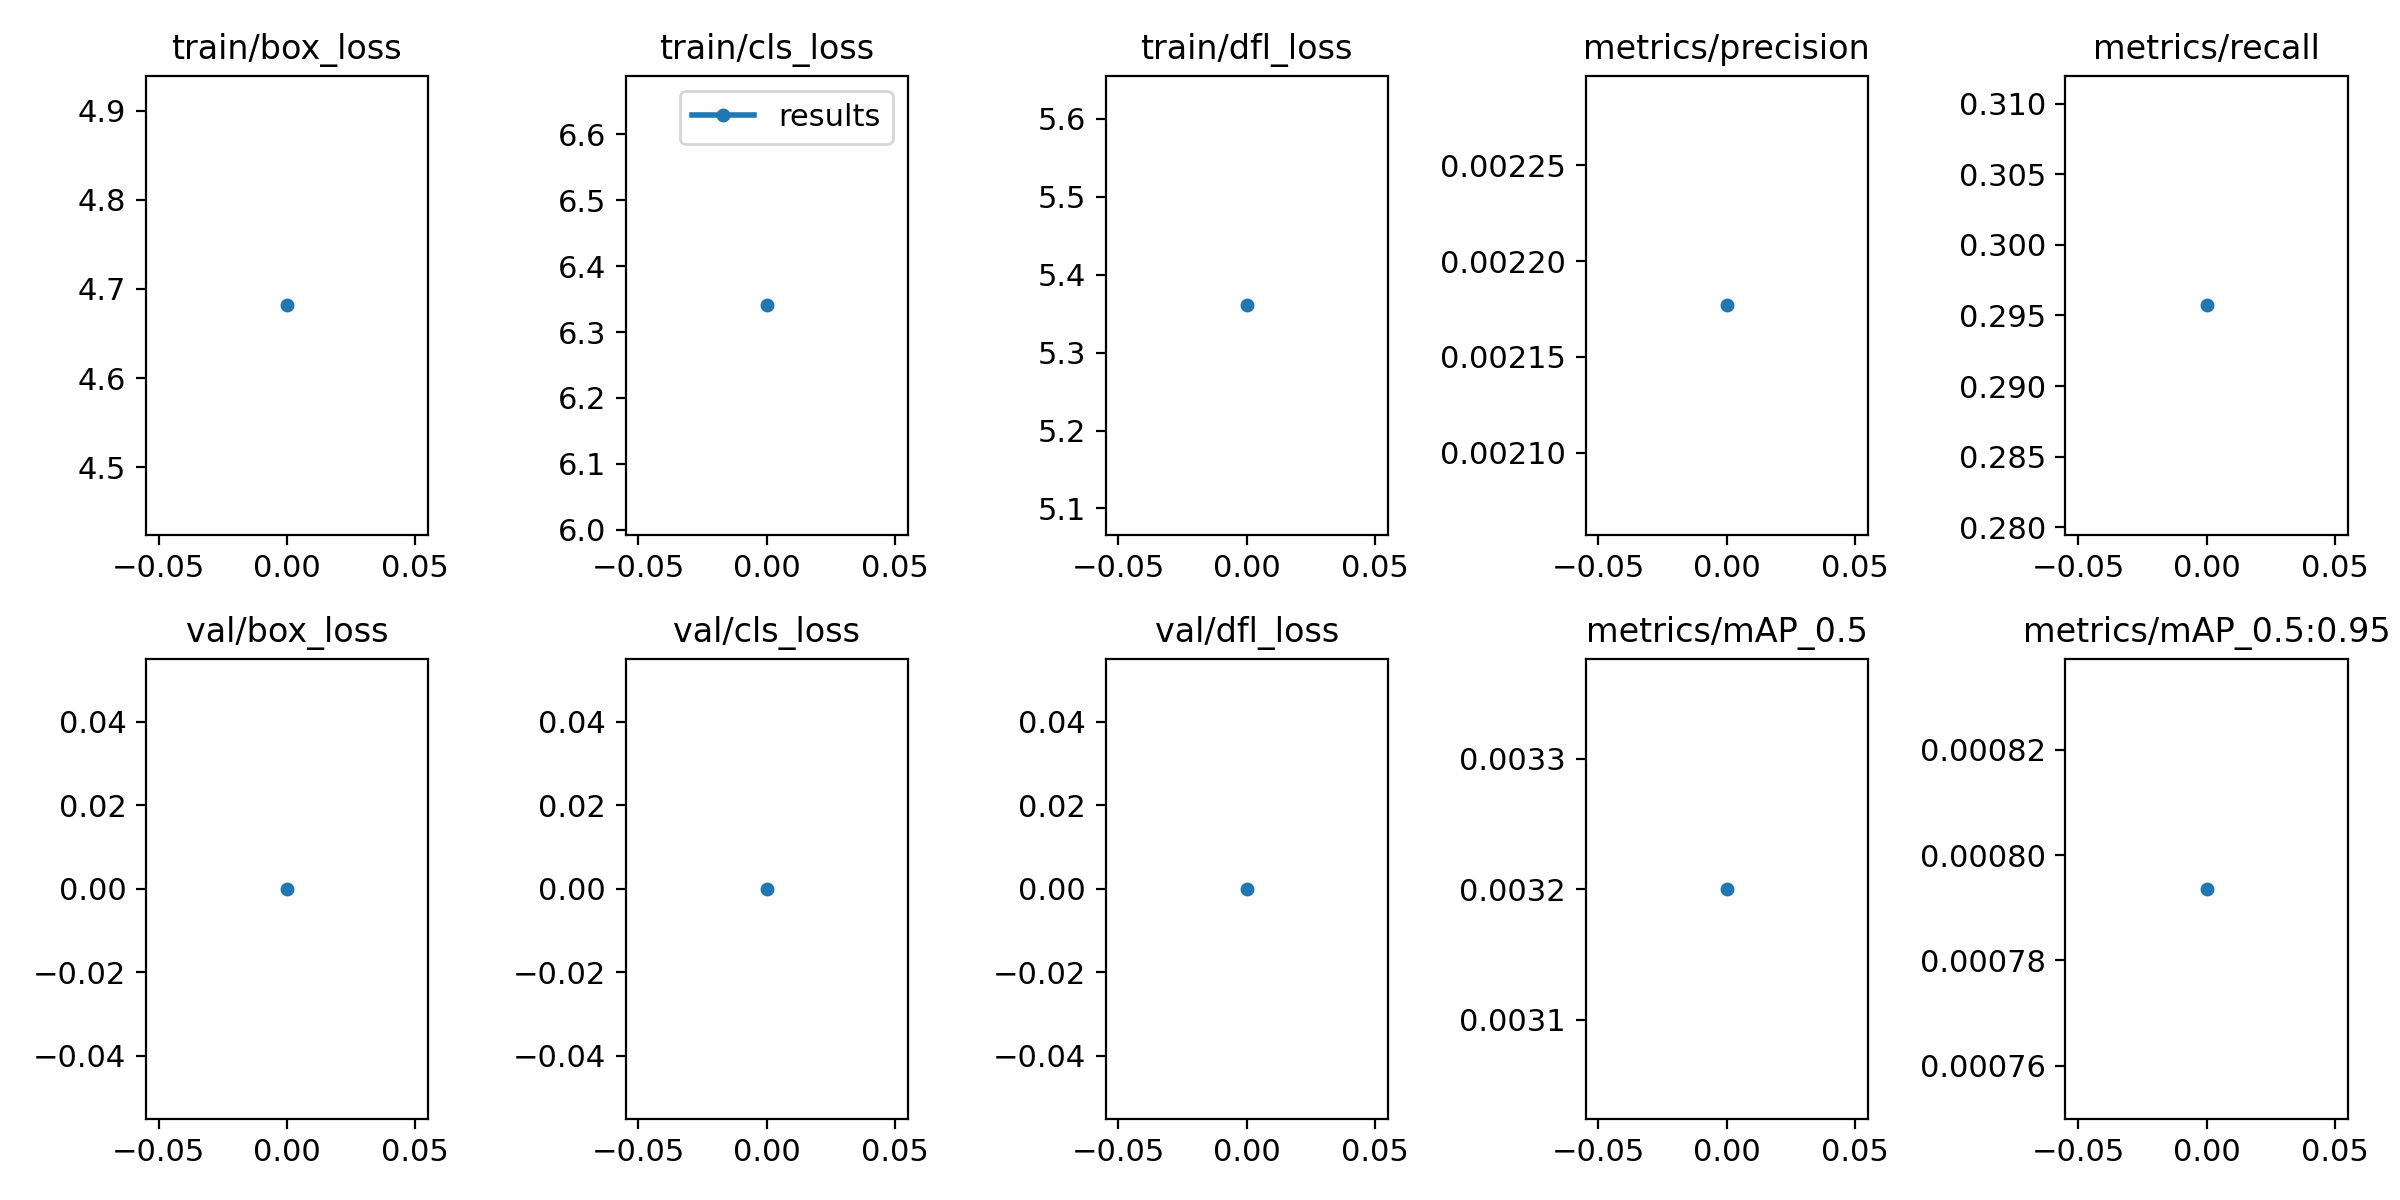

In [11]:
from utils.plots import plot_results  # Para criar o gráfico de resultados
from IPython.display import Image  # Para visualizar a imagem gerada

# Caminho para o arquivo results.txt
results_file = '/content/drive/MyDrive/Pessoal/Project_Helmet/yolov9/runs/train/yolov9_results2/results.csv'

# Plotando os resultados
plot_results(file=results_file, dir='')  # Argumento correto é 'path'

# Visualizando o gráfico gerado
Image(filename='/content/drive/MyDrive/Pessoal/Project_Helmet/yolov9/runs/train/yolov9_results2/results.png', width=1000)
